# Section 42: Tuning Neural Networks

- 12/04/20
- online-ds-ft-081720

> NOTE: YOU MAY **NOT** USE THE FUNCTIONS FROM THIS NOTEBOOK IN YOUR PROJECTS

## Announcements

- Monday's Check-In will also be Phase 4 Project Kick-Off
    - It will be 1 hour long (12-1pm).
    
- Study Group Topics now appear as all-day events instead of changing the title of our study group event.

- Topic 43 will be covered during Phase 5/capstone


## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)



## Questions/Comments?
- What are some possible reasons for dramatic swings in validation accuracy from epoch to epoch?


## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Overview  - Neural Network Tuning 

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models
    - but also set with tensorflow. tf.random.set_seed
    


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### Dealing with Bias/Variance

- Balancing Bias/Variance:
    - High Bias models are **underfit**
    - High Variance models are **overfit**



- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categorical cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- **can also uses custom scoring functions**

## Using Regularization

### L1 & L2 Regularlization
- These methods of regularizaiton do so by penalizing coefficients(regression) or weights(neural networks),
    - L1 & L2 exist in regression models as well. There, L1='Lasso Regressions' , L2='Ridge regression'
    
    

- **L1 & L2 regularization add a term to the cost function.**

$$Cost function = Loss (say, binary cross entropy) + Regularization term$$

$$ J (w^{[1]},b^{[1]},...,w^{[L]},b^{[L]}) = \dfrac{1}{m} \sum^m_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})+ \dfrac{\lambda}{2m}\sum^L_{l=1}||w^{[l]}||^2$$
- where $\lambda$ is the regularization parameter. 

- **The difference between  L1 vs L2 is that L1 is just the sum of the weights whereas L2 is the sum of the _square_of the weights.**  


<br><br>
- **L1 Regularization:**
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||$$
    - Uses the absolute value of weights and may reduce the weights down to 0. 
    
        
- **L2 Regularization:**:
    $$ Cost function = Loss + \frac{\lambda}{2m} * \sum ||w||^2$$
    - Also known as weight decay, as it forces weights to decay towards zero, but never exactly 0.. 

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

### Additional Options

#### Dropout 

#### Early Stopping

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to detect cats vs dogs

## Installs, Imports, & Functions

In [10]:
# !pip install -U tensorflow
from tensorflow.random import set_seed
set_seed(321)

import numpy as np
np.random.seed(321)

import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.3.1'

In [11]:
# !pip install -U fsds
from fsds.imports import *

## Loading in the data

- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [12]:
import os,glob
# print(os.path.abspath(os.curdir))

In [13]:
# change dataset_folder to match where you stored the files
base_folder ="/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"

## Check contents of base fodler
os.listdir(base_folder)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [18]:
## Define train_folder and test_folder

train_folder = base_folder + 'training_set/'
test_folder = base_folder + 'test_set/'

## Check contents of train_folder
os.listdir(train_folder)

['dogs', 'cats', '.DS_Store']

### Using ImageDataGenerator.flow_from_directory

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf


> Train-Test-Val Split: https://medium.com/@olagokeibrahim165/split-train-data-into-training-and-validation-when-using-imagedatagenerator-in-keras-ffdc88bbf6f3

In [20]:
## get num images
import os,glob
def get_num_images(train_folder,folders=['dogs','cats'],verbose=True):
    """Gets the total number of images from all folders listed"""
    num_images = 0
    for folder in folders:
        num_in_folder = len(os.listdir(train_folder+folder))
        
        if verbose:
            print(f"- There are {num_in_folder} images in {folder} folder.")
        num_images+=num_in_folder
    return num_images

In [22]:
## Get the Number of total images for batch size 
BATCH_SIZE_TRAIN = get_num_images(train_folder,verbose=0)
BATCH_SIZE_TEST_VAL = get_num_images(test_folder,verbose=0)
print(f"Training images: {BATCH_SIZE_TRAIN}")
print(f"Test & Val images: {BATCH_SIZE_TEST_VAL}")

Training images: 8002
Test & Val images: 2002


In [26]:
## Make validation split
VAL_SPLIT = 0.2
BATCH_SIZE_VAL = round(VAL_SPLIT * BATCH_SIZE_TEST_VAL)
BATCH_SIZE_TEST = round((1-VAL_SPLIT)* BATCH_SIZE_TEST_VAL)

BATCH_SIZE_VAL,BATCH_SIZE_TEST


(400, 1602)

In [28]:
## MAKING IMAGE DATA GENERATORS FOR TRAIN TEST VAL
IMG_SIZE = (64,64)

## Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale =1/255.)

test_val_datagen = ImageDataGenerator(rescale =1/255., validation_split=VAL_SPLIT)

In [65]:
## Make Training Sets With All Images
training_set_full = train_datagen.flow_from_directory(train_folder,
                                                      target_size=IMG_SIZE,
                                                      class_mode='binary',
                                                      batch_size=BATCH_SIZE_TRAIN)                                          
                                                      

test_set_full =  test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                      batch_size=BATCH_SIZE_TEST,
                                                      class_mode='binary',
                                                     subset='training')      

val_set_full = test_val_datagen.flow_from_directory(test_folder,
                                                      target_size=IMG_SIZE,
                                                      batch_size=BATCH_SIZE_VAL,
                                                    class_mode='binary',
                                                     subset='validation')   

Found 8000 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [66]:
## MAKE X and YS FROM GENERATORS
X_train,y_train = next(training_set_full)
y_train

array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [67]:
# TEST AND VAL SETS
X_test, y_test=next(test_set_full)
X_val,y_val = next(val_set_full)

In [68]:
## check train shape
X_train.shape

(8000, 64, 64, 3)

In [69]:
## UNROW IMAGES FOR SEQUENTIAL MODEL
X_train_unrow = X_train.reshape(X_train.shape[0],-1 )
X_test_unrow = X_test.reshape(X_test.shape[0],-1)
X_val_unrow = X_val.reshape(X_val.shape[0],-1)
X_train_unrow.shape

(8000, 12288)

In [70]:
X_train_unrow[0].shape

(12288,)

In [71]:
training_set_full.class_indices

{'cats': 0, 'dogs': 1}

0.0

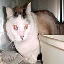

In [72]:
## Display random image 
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train[i]))#.reshape(32,32,3)))

# Using Dense Networks

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras import models,layers,optimizers,regularizers,activations
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

In [74]:
X_train_unrow[0].shape

(12288,)

In [75]:
y_train.shape

(8000,)

In [77]:
##N Sequential model: 64 units, relu, final=dense 1, sigmoid
model_1 = Sequential()
model_1.add(Dense(65,activation='relu',input_shape=X_train_unrow[0].shape))
model_1.add(Dense(1,activation='sigmoid'))
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',
                                                                    tf.keras.metrics.Recall()])
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 65)                798785    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 66        
Total params: 798,851
Trainable params: 798,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=3,verbose=1)

In [79]:
## Fit Model with 20 epochs
history = model_1.fit(X_train_unrow,y_train,
                      validation_data=(X_val_unrow,y_val),callbacks=[earlystop],
                      epochs=500)
                      

Epoch 1/500
250/250 [==============================] - 1s 5ms/step - loss: 0.8183 - accuracy: 0.5378 - recall_2: 0.5385 - val_loss: 0.6914 - val_accuracy: 0.5475 - val_recall_2: 0.3150
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 0.7308 - accuracy: 0.5677 - recall_2: 0.5670 - val_loss: 0.6641 - val_accuracy: 0.6000 - val_recall_2: 0.5250
Epoch 3/500
250/250 [==============================] - 1s 4ms/step - loss: 0.6845 - accuracy: 0.5910 - recall_2: 0.5940 - val_loss: 0.6790 - val_accuracy: 0.5575 - val_recall_2: 0.2800
Epoch 4/500
250/250 [==============================] - 1s 4ms/step - loss: 0.6756 - accuracy: 0.5897 - recall_2: 0.5878 - val_loss: 0.6641 - val_accuracy: 0.5975 - val_recall_2: 0.7200
Epoch 5/500
250/250 [==============================] - 1s 4ms/step - loss: 0.6738 - accuracy: 0.5891 - recall_2: 0.5907 - val_loss: 0.6648 - val_accuracy: 0.5800 - val_recall_2: 0.6450
Epoch 6/500
250/250 [==============================] - 1s 4ms/step - loss: 

In [80]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,recall_2,val_loss,val_accuracy,val_recall_2
0,0.818269,0.537750,0.53850,0.691358,0.5475,0.315
1,0.730786,0.567750,0.56700,0.664146,0.6000,0.525
2,0.684550,0.591000,0.59400,0.679039,0.5575,0.280
3,0.675629,0.589750,0.58775,0.664086,0.5975,0.720
4,0.673804,0.589125,0.59075,0.664751,0.5800,0.645
5,0.651622,0.616000,0.62300,0.670782,0.5750,0.810
6,0.654067,0.611000,0.60750,0.666363,0.5925,0.670


In [81]:
# history_df.plot(subplots=True)

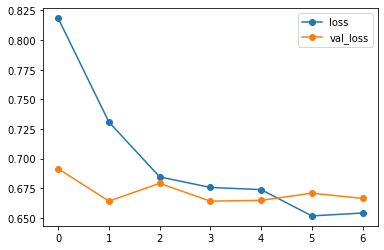

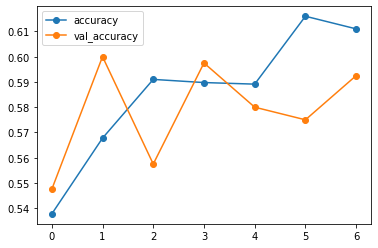

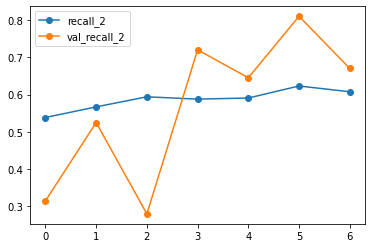

In [82]:
metrics = ['loss','accuracy','recall']
for metric in metrics:
    plot_me = history_df[[col for col in history_df.columns if metric in col]]
    plot_me.plot(marker='o')

In [ ]:
## Get History  as adf


In [ ]:
## PLotn all fo the metrics in history

In [83]:
## Model.Evaluate
model_1.evaluate(X_test_unrow,y_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6106 - recall_2: 0.6825


[0.6610205173492432, 0.6106250286102295, 0.6825000047683716]

In [90]:
## Get PRedictions
y_hat_test = model_1.predict(X_test_unrow)
# y_hat_test

In [87]:
y_test

array([1., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [89]:
## Classification Report
from sklearn import metrics
print(metrics.classification_report(y_test, y_hat_test.round()))

              precision    recall  f1-score   support

         0.0       0.63      0.54      0.58       800
         1.0       0.60      0.68      0.64       800

    accuracy                           0.61      1600
   macro avg       0.61      0.61      0.61      1600
weighted avg       0.61      0.61      0.61      1600



### Functionize Model Creation & Plotting

In [91]:
## def make_model
def make_model():
    ##N Sequential model: 64 units, relu, final=dense 1, sigmoid
    model_1 = Sequential()
    model_1.add(Dense(65,activation='relu',input_shape=X_train_unrow[0].shape))
    model_1.add(Dense(1,activation='sigmoid'))
    model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',
                                                                        tf.keras.metrics.Recall()])
    display(model_1.summary())
    return model_1
    

In [95]:
def plot_history(history, metrics = ['loss','accuracy','recall']):
    history_df = pd.DataFrame(history.history)
    for metric in metrics:
        plot_me = history_df[[col for col in history_df.columns if metric in col]]
        plot_me.plot(marker='o')

In [94]:
## Use new functions to make model and plot history
model_2 = make_model()
history_2 = model_2.fit(X_train_unrow,y_train,
                      validation_data=(X_val_unrow,y_val),callbacks=[earlystop],
                      epochs=500)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 65)                798785    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 66        
Total params: 798,851
Trainable params: 798,851
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/500
250/250 [==============================] - 1s 5ms/step - loss: 0.8350 - accuracy: 0.5297 - recall_4: 0.5322 - val_loss: 0.6925 - val_accuracy: 0.5525 - val_recall_4: 0.3450
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 0.7430 - accuracy: 0.5655 - recall_4: 0.5673 - val_loss: 0.6774 - val_accuracy: 0.5700 - val_recall_4: 0.3300
Epoch 3/500
250/250 [==============================] - 1s 4ms/step - loss: 0.7088 - accuracy: 0.5813 - recall_4: 0.5810 - val_loss: 0.6856 - val_accuracy: 0.5625 - val_recall_4: 0.3000
Epoch 4/500
250/250 [==============================] - 1s 4ms/step - loss: 0.6714 - accuracy: 0.6106 - recall_4: 0.6120 - val_loss: 0.6541 - val_accuracy: 0.6025 - val_recall_4: 0.6950
Epoch 5/500
250/250 [==============================] - 1s 4ms/step - loss: 0.6561 - accuracy: 0.6184 - recall_4: 0.6170 - val_loss: 0.6652 - val_accuracy: 0.5800 - val_recall_4: 0.6600
Epoch 6/500
250/250 [==============================] - 1s 4ms/step - loss: 

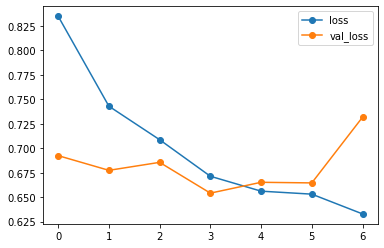

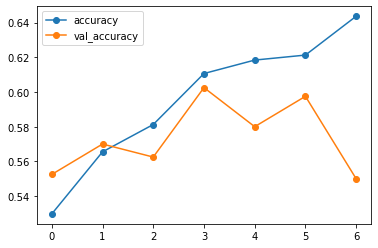

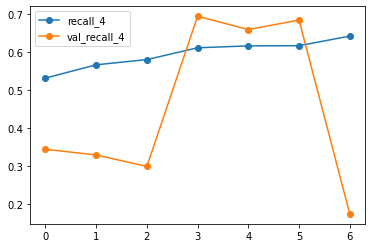

In [96]:
plot_history(history_2)

### Combine the Whole Process Into One Func

In [ ]:
def make_fit_plot_model():
    None

In [ ]:
## Test out new function


## Activity: Ok...so now what??

> Using the rules of thumb and your own knowledge/research, attempt several methods to improve the results of the model. 

# HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [127]:
## def make_model
def make_model_cv(n_units=65,activation='relu',optimizer='adam'):
    ##N Sequential model: 64 units, relu, final=dense 1, sigmoid
    model_1 = Sequential()
    model_1.add(Dense(n_units,activation=activation,
                      input_shape=X_train_unrow[0].shape))
    model_1.add(Dense(1,activation='sigmoid'))
    model_1.compile(optimizer=optimizer,loss='binary_crossentropy',
                    metrics=['accuracy', tf.keras.metrics.Recall()])
    display(model_1.summary())
    return model_1
    

In [101]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(make_model_cv)
model

In [103]:
from sklearn.model_selection import GridSearchCV
params = {'n_units':[32,64],
         'activation':['relu',tf.keras.layers.LeakyReLU()],
         'batch_size':[16,32]}
grid = GridSearchCV(model, params,cv=3 )
grid

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f920d96b7f0>,
             param_grid={'activation': ['relu',
                         'batch_size': [16, 32], 'n_units': [32, 64]})

In [104]:
history = grid.fit(X_train_unrow,y_train,validation_data=(X_val_unrow,y_val),callbacks=[earlystop],
                      epochs=500)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                393248    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 393,281
Trainable params: 393,281
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7446 - accuracy: 0.5457 - recall_5: 0.5572 - val_loss: 0.6928 - val_accuracy: 0.5775 - val_recall_5: 0.7750
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6949 - accuracy: 0.5380 - recall_5: 0.3328 - val_loss: 0.6928 - val_accuracy: 0.5025 - val_recall_5: 0.0050
Epoch 3/500
334/334 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5012 - recall_5: 0.0239 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_5: 0.0000e+00
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4917 - recall_5: 0.3620 - val_loss: 0.6931 - val_accuracy: 0.5000 - val_recall_5: 1.0000
Epoch 00004: early stopping
167/167 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4972 - recall_5: 1.0000
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Out

None

Epoch 1/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7273 - accuracy: 0.5477 - recall_6: 0.5494 - val_loss: 0.6930 - val_accuracy: 0.5350 - val_recall_6: 0.2200
Epoch 2/500
334/334 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5674 - recall_6: 0.5749 - val_loss: 0.6769 - val_accuracy: 0.6050 - val_recall_6: 0.6600
Epoch 3/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6660 - accuracy: 0.5963 - recall_6: 0.5872 - val_loss: 0.6824 - val_accuracy: 0.5850 - val_recall_6: 0.8000
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6669 - accuracy: 0.5980 - recall_6: 0.5924 - val_loss: 0.6858 - val_accuracy: 0.5550 - val_recall_6: 0.8600
Epoch 5/500
334/334 [==============================] - 1s 2ms/step - loss: 0.6586 - accuracy: 0.6053 - recall_6: 0.6025 - val_loss: 0.6988 - val_accuracy: 0.5350 - val_recall_6: 0.1700
Epoch 00005: early stopping
167/167 [==============================] - 0s 2

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 0.9016 - accuracy: 0.5251 - recall_7: 0.5275 - val_loss: 1.3361 - val_accuracy: 0.5000 - val_recall_7: 0.0050
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7875 - accuracy: 0.5540 - recall_7: 0.5430 - val_loss: 0.6902 - val_accuracy: 0.5375 - val_recall_7: 0.8300
Epoch 3/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7168 - accuracy: 0.5742 - recall_7: 0.5742 - val_loss: 0.7115 - val_accuracy: 0.5450 - val_recall_7: 0.9050
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5827 - recall_7: 0.5885 - val_loss: 0.6711 - val_accuracy: 0.5775 - val_recall_7: 0.7600
Epoch 5/500
334/334 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.5699 - recall_7: 0.4115 - val_loss: 0.6924 - val_accuracy: 0.5000 - val_recall_7: 0.0000e+00
Epoch 6/500
334/334 [==============================] - 1s 3ms/step - lo

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.1229 - accuracy: 0.5355 - recall_8: 0.5366 - val_loss: 1.5626 - val_accuracy: 0.5050 - val_recall_8: 0.0100
Epoch 2/500
334/334 [==============================] - 1s 4ms/step - loss: 0.8692 - accuracy: 0.5642 - recall_8: 0.5752 - val_loss: 0.7644 - val_accuracy: 0.5650 - val_recall_8: 0.8700
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7752 - accuracy: 0.5892 - recall_8: 0.5871 - val_loss: 0.6939 - val_accuracy: 0.6050 - val_recall_8: 0.6200
Epoch 4/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.6134 - recall_8: 0.6092 - val_loss: 0.8638 - val_accuracy: 0.5375 - val_recall_8: 0.1100
Epoch 5/500
334/334 [==============================] - 2s 5ms/step - loss: 0.6654 - accuracy: 0.6319 - recall_8: 0.6313 - val_loss: 1.0031 - val_accuracy: 0.5175 - val_recall_8: 0.9800
Epoch 6/500
334/334 [==============================] - 1s 4ms/step - loss: 

None

Epoch 1/500
334/334 [==============================] - 2s 5ms/step - loss: 0.7380 - accuracy: 0.5121 - recall_9: 0.8099 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_9: 1.0000
Epoch 2/500
334/334 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.5040 - recall_9: 0.9753 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_9: 1.0000
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - recall_9: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_9: 1.0000
Epoch 4/500
334/334 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - recall_9: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_9: 1.0000
Epoch 5/500
334/334 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - recall_9: 1.0000 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_9: 1.0000
Epoch 6/500
334/334 [==============================] - 1s 4ms/step - loss: 

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.0518 - accuracy: 0.5341 - recall_10: 0.5207 - val_loss: 0.7395 - val_accuracy: 0.5375 - val_recall_10: 0.2650
Epoch 2/500
334/334 [==============================] - 1s 4ms/step - loss: 0.8293 - accuracy: 0.5583 - recall_10: 0.5520 - val_loss: 0.6852 - val_accuracy: 0.5900 - val_recall_10: 0.4550
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7263 - accuracy: 0.5787 - recall_10: 0.5821 - val_loss: 0.7244 - val_accuracy: 0.5450 - val_recall_10: 0.9050
Epoch 4/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7028 - accuracy: 0.5816 - recall_10: 0.5897 - val_loss: 0.6722 - val_accuracy: 0.5875 - val_recall_10: 0.6800
Epoch 5/500
334/334 [==============================] - 1s 4ms/step - loss: 0.6631 - accuracy: 0.6061 - recall_10: 0.6081 - val_loss: 0.6734 - val_accuracy: 0.5650 - val_recall_10: 0.7850
Epoch 6/500
334/334 [==============================] - 1s 4ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 0.7202 - accuracy: 0.5042 - recall_11: 0.4652 - val_loss: 0.6933 - val_accuracy: 0.4925 - val_recall_11: 0.9850
Epoch 2/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5243 - recall_11: 0.8190 - val_loss: 0.6885 - val_accuracy: 0.5425 - val_recall_11: 0.4750
Epoch 3/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6812 - accuracy: 0.5682 - recall_11: 0.6672 - val_loss: 0.6906 - val_accuracy: 0.5375 - val_recall_11: 0.8600
Epoch 4/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6765 - accuracy: 0.5760 - recall_11: 0.7281 - val_loss: 0.6908 - val_accuracy: 0.5675 - val_recall_11: 0.6050
Epoch 5/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6706 - accuracy: 0.5820 - recall_11: 0.7397 - val_loss: 0.6882 - val_accuracy: 0.5575 - val_recall_11: 0.6200
Epoch 6/500
167/167 [==============================] - 1s 3ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 0.7300 - accuracy: 0.5378 - recall_12: 0.5464 - val_loss: 0.6795 - val_accuracy: 0.5775 - val_recall_12: 0.7000
Epoch 2/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6895 - accuracy: 0.5314 - recall_12: 0.5404 - val_loss: 0.6932 - val_accuracy: 0.5000 - val_recall_12: 1.0000
Epoch 3/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.5292 - recall_12: 0.8720 - val_loss: 0.6864 - val_accuracy: 0.5700 - val_recall_12: 0.5050
Epoch 4/500
167/167 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.5843 - recall_12: 0.6647 - val_loss: 0.6933 - val_accuracy: 0.5275 - val_recall_12: 0.9100
Epoch 00004: early stopping
84/84 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5414 - recall_12: 0.9202
Model: "sequential_15"
_________________________________________________________________
Layer (type)                

None

Epoch 1/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8300 - accuracy: 0.5307 - recall_13: 0.5298 - val_loss: 0.7776 - val_accuracy: 0.5150 - val_recall_13: 0.1400
Epoch 2/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7607 - accuracy: 0.5621 - recall_13: 0.5437 - val_loss: 0.6660 - val_accuracy: 0.5875 - val_recall_13: 0.5600
Epoch 3/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7460 - accuracy: 0.5767 - recall_13: 0.5818 - val_loss: 0.6837 - val_accuracy: 0.6000 - val_recall_13: 0.4250
Epoch 4/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7714 - accuracy: 0.5834 - recall_13: 0.5784 - val_loss: 0.8018 - val_accuracy: 0.5225 - val_recall_13: 0.9550
Epoch 5/500
167/167 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5990 - recall_13: 0.5983 - val_loss: 0.6715 - val_accuracy: 0.6025 - val_recall_13: 0.6300
Epoch 00005: early stopping
84/84 [==============================

None

Epoch 1/500
167/167 [==============================] - 3s 15ms/step - loss: 0.9120 - accuracy: 0.5258 - recall_14: 0.5453 - val_loss: 0.6903 - val_accuracy: 0.5425 - val_recall_14: 0.5550
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7914 - accuracy: 0.5573 - recall_14: 0.5531 - val_loss: 0.7503 - val_accuracy: 0.5300 - val_recall_14: 0.1800
Epoch 3/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7159 - accuracy: 0.5927 - recall_14: 0.6013 - val_loss: 0.6942 - val_accuracy: 0.5775 - val_recall_14: 0.8050
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.5833 - recall_14: 0.5961 - val_loss: 1.0859 - val_accuracy: 0.5025 - val_recall_14: 0.0050
Epoch 00004: early stopping
84/84 [==============================] - 0s 2ms/step - loss: 1.0965 - accuracy: 0.5081 - recall_14: 0.0173
Model: "sequential_17"
_________________________________________________________________
Layer (type)               

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 0.9143 - accuracy: 0.5333 - recall_15: 0.5299 - val_loss: 0.6814 - val_accuracy: 0.5575 - val_recall_15: 0.4700
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7018 - accuracy: 0.5745 - recall_15: 0.5909 - val_loss: 0.6967 - val_accuracy: 0.5475 - val_recall_15: 0.3100
Epoch 3/500
167/167 [==============================] - 1s 4ms/step - loss: 0.6823 - accuracy: 0.5845 - recall_15: 0.5786 - val_loss: 0.6774 - val_accuracy: 0.5900 - val_recall_15: 0.6500
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.6755 - accuracy: 0.6012 - recall_15: 0.5924 - val_loss: 0.7169 - val_accuracy: 0.5400 - val_recall_15: 0.9150
Epoch 5/500
167/167 [==============================] - 1s 4ms/step - loss: 0.6600 - accuracy: 0.6072 - recall_15: 0.6123 - val_loss: 0.8909 - val_accuracy: 0.5325 - val_recall_15: 0.0700
Epoch 6/500
167/167 [==============================] - 1s 4ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 6ms/step - loss: 0.9934 - accuracy: 0.5313 - recall_16: 0.5279 - val_loss: 0.7465 - val_accuracy: 0.5100 - val_recall_16: 0.1350
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7524 - accuracy: 0.5583 - recall_16: 0.5512 - val_loss: 0.7044 - val_accuracy: 0.5475 - val_recall_16: 0.1700
Epoch 3/500
167/167 [==============================] - 1s 5ms/step - loss: 0.7087 - accuracy: 0.5722 - recall_16: 0.5735 - val_loss: 0.6920 - val_accuracy: 0.5500 - val_recall_16: 0.8300
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7237 - accuracy: 0.5757 - recall_16: 0.5682 - val_loss: 0.6820 - val_accuracy: 0.5650 - val_recall_16: 0.7500
Epoch 5/500
167/167 [==============================] - 1s 4ms/step - loss: 0.6856 - accuracy: 0.5986 - recall_16: 0.6063 - val_loss: 0.6939 - val_accuracy: 0.5550 - val_recall_16: 0.8800
Epoch 6/500
167/167 [==============================] - 1s 4ms/ste

None

Epoch 1/500
334/334 [==============================] - 1s 3ms/step - loss: 1.0504 - accuracy: 0.5333 - recall_17: 0.5310 - val_loss: 1.4640 - val_accuracy: 0.5025 - val_recall_17: 0.0050
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8530 - accuracy: 0.5618 - recall_17: 0.5696 - val_loss: 0.7132 - val_accuracy: 0.5650 - val_recall_17: 0.7250
Epoch 3/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7776 - accuracy: 0.5783 - recall_17: 0.5849 - val_loss: 0.7196 - val_accuracy: 0.5800 - val_recall_17: 0.8450
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7002 - accuracy: 0.6015 - recall_17: 0.6025 - val_loss: 0.7309 - val_accuracy: 0.5600 - val_recall_17: 0.2550
Epoch 5/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7016 - accuracy: 0.6089 - recall_17: 0.6081 - val_loss: 0.8507 - val_accuracy: 0.5200 - val_recall_17: 0.9750
Epoch 00005: early stopping
167/167 [============================

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 0.9883 - accuracy: 0.5290 - recall_18: 0.5341 - val_loss: 1.1983 - val_accuracy: 0.5000 - val_recall_18: 0.0050
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8303 - accuracy: 0.5740 - recall_18: 0.5715 - val_loss: 0.9513 - val_accuracy: 0.5175 - val_recall_18: 0.9700
Epoch 3/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8373 - accuracy: 0.5721 - recall_18: 0.5745 - val_loss: 0.8987 - val_accuracy: 0.5300 - val_recall_18: 0.9650
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.5937 - recall_18: 0.5951 - val_loss: 1.0262 - val_accuracy: 0.5100 - val_recall_18: 0.0350
Epoch 5/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7215 - accuracy: 0.6087 - recall_18: 0.6074 - val_loss: 0.9076 - val_accuracy: 0.5325 - val_recall_18: 0.9600
Epoch 6/500
334/334 [==============================] - 1s 3ms/ste

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.0305 - accuracy: 0.5232 - recall_19: 0.5256 - val_loss: 0.6965 - val_accuracy: 0.5775 - val_recall_19: 0.6700
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8437 - accuracy: 0.5607 - recall_19: 0.5565 - val_loss: 1.0232 - val_accuracy: 0.5100 - val_recall_19: 0.9600
Epoch 3/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8390 - accuracy: 0.5737 - recall_19: 0.5708 - val_loss: 0.7656 - val_accuracy: 0.5425 - val_recall_19: 0.8550
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7425 - accuracy: 0.5941 - recall_19: 0.5953 - val_loss: 0.7058 - val_accuracy: 0.5825 - val_recall_19: 0.4450
Epoch 00004: early stopping
167/167 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.5671 - recall_19: 0.4599
Model: "sequential_22"
_________________________________________________________________
Layer (type)              

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.1640 - accuracy: 0.5312 - recall_20: 0.5303 - val_loss: 2.4077 - val_accuracy: 0.5000 - val_recall_20: 0.0000e+00
Epoch 2/500
334/334 [==============================] - 1s 4ms/step - loss: 0.9552 - accuracy: 0.5601 - recall_20: 0.5643 - val_loss: 0.8927 - val_accuracy: 0.5475 - val_recall_20: 0.8700
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.8021 - accuracy: 0.5905 - recall_20: 0.5868 - val_loss: 1.0825 - val_accuracy: 0.5325 - val_recall_20: 0.9500
Epoch 4/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7993 - accuracy: 0.5905 - recall_20: 0.5991 - val_loss: 1.3925 - val_accuracy: 0.5100 - val_recall_20: 0.0300
Epoch 5/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7419 - accuracy: 0.6135 - recall_20: 0.6219 - val_loss: 0.7311 - val_accuracy: 0.5600 - val_recall_20: 0.3550
Epoch 6/500
334/334 [==============================] - 1s 4ms

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.0777 - accuracy: 0.5344 - recall_21: 0.5348 - val_loss: 1.2018 - val_accuracy: 0.5000 - val_recall_21: 0.0050
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8576 - accuracy: 0.5667 - recall_21: 0.5573 - val_loss: 0.9452 - val_accuracy: 0.5150 - val_recall_21: 0.9600
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.8573 - accuracy: 0.5691 - recall_21: 0.5719 - val_loss: 0.8866 - val_accuracy: 0.5425 - val_recall_21: 0.9550
Epoch 4/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7447 - accuracy: 0.5873 - recall_21: 0.5924 - val_loss: 1.1555 - val_accuracy: 0.5025 - val_recall_21: 0.0050
Epoch 5/500
334/334 [==============================] - 1s 3ms/step - loss: 0.7273 - accuracy: 0.6042 - recall_21: 0.6067 - val_loss: 0.7541 - val_accuracy: 0.5525 - val_recall_21: 0.8100
Epoch 6/500
334/334 [==============================] - 1s 3ms/ste

None

Epoch 1/500
334/334 [==============================] - 1s 4ms/step - loss: 1.2144 - accuracy: 0.5292 - recall_22: 0.5271 - val_loss: 0.7267 - val_accuracy: 0.5650 - val_recall_22: 0.7150
Epoch 2/500
334/334 [==============================] - 1s 3ms/step - loss: 0.8433 - accuracy: 0.5750 - recall_22: 0.5705 - val_loss: 0.8634 - val_accuracy: 0.5250 - val_recall_22: 0.8850
Epoch 3/500
334/334 [==============================] - 1s 4ms/step - loss: 0.8499 - accuracy: 0.5727 - recall_22: 0.5712 - val_loss: 0.7563 - val_accuracy: 0.5550 - val_recall_22: 0.8350
Epoch 4/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7410 - accuracy: 0.5945 - recall_22: 0.5923 - val_loss: 0.7204 - val_accuracy: 0.5425 - val_recall_22: 0.7850
Epoch 5/500
334/334 [==============================] - 1s 4ms/step - loss: 0.7396 - accuracy: 0.5971 - recall_22: 0.5916 - val_loss: 0.7905 - val_accuracy: 0.5400 - val_recall_22: 0.1800
Epoch 6/500
334/334 [==============================] - 1s 4ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 0.8621 - accuracy: 0.5310 - recall_23: 0.5363 - val_loss: 0.7574 - val_accuracy: 0.5450 - val_recall_23: 0.8950
Epoch 2/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7717 - accuracy: 0.5633 - recall_23: 0.5598 - val_loss: 0.7761 - val_accuracy: 0.5300 - val_recall_23: 0.1600
Epoch 3/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7222 - accuracy: 0.5839 - recall_23: 0.5916 - val_loss: 0.6765 - val_accuracy: 0.5725 - val_recall_23: 0.6350
Epoch 4/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7723 - accuracy: 0.5811 - recall_23: 0.5924 - val_loss: 1.5570 - val_accuracy: 0.5000 - val_recall_23: 0.0000e+00
Epoch 5/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7524 - accuracy: 0.5912 - recall_23: 0.5931 - val_loss: 0.7568 - val_accuracy: 0.5425 - val_recall_23: 0.1950
Epoch 6/500
167/167 [==============================] - 1s 4ms

None

Epoch 1/500
167/167 [==============================] - 1s 4ms/step - loss: 1.0471 - accuracy: 0.5250 - recall_24: 0.5232 - val_loss: 0.7336 - val_accuracy: 0.5500 - val_recall_24: 0.2150
Epoch 2/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7558 - accuracy: 0.5588 - recall_24: 0.5580 - val_loss: 0.8648 - val_accuracy: 0.5225 - val_recall_24: 0.0850
Epoch 3/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7350 - accuracy: 0.5847 - recall_24: 0.5827 - val_loss: 0.6813 - val_accuracy: 0.5800 - val_recall_24: 0.5300
Epoch 4/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.5923 - recall_24: 0.5902 - val_loss: 0.7263 - val_accuracy: 0.5500 - val_recall_24: 0.2150
Epoch 5/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7267 - accuracy: 0.5895 - recall_24: 0.5883 - val_loss: 0.7197 - val_accuracy: 0.5475 - val_recall_24: 0.7600
Epoch 6/500
167/167 [==============================] - 1s 4ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 4ms/step - loss: 0.9482 - accuracy: 0.5347 - recall_25: 0.5399 - val_loss: 1.0642 - val_accuracy: 0.5000 - val_recall_25: 0.0000e+00
Epoch 2/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7841 - accuracy: 0.5579 - recall_25: 0.5407 - val_loss: 0.6725 - val_accuracy: 0.5650 - val_recall_25: 0.3250
Epoch 3/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7687 - accuracy: 0.5677 - recall_25: 0.5750 - val_loss: 0.6803 - val_accuracy: 0.5800 - val_recall_25: 0.7400
Epoch 4/500
167/167 [==============================] - 0s 3ms/step - loss: 0.7809 - accuracy: 0.5787 - recall_25: 0.5784 - val_loss: 0.9875 - val_accuracy: 0.5125 - val_recall_25: 0.9850
Epoch 5/500
167/167 [==============================] - 1s 3ms/step - loss: 0.7020 - accuracy: 0.6065 - recall_25: 0.6104 - val_loss: 0.7249 - val_accuracy: 0.5550 - val_recall_25: 0.8900
Epoch 00005: early stopping
84/84 [==========================

None

Epoch 1/500
167/167 [==============================] - 1s 6ms/step - loss: 0.8976 - accuracy: 0.5329 - recall_26: 0.5423 - val_loss: 0.7108 - val_accuracy: 0.5575 - val_recall_26: 0.3850
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8269 - accuracy: 0.5575 - recall_26: 0.5524 - val_loss: 0.9750 - val_accuracy: 0.5250 - val_recall_26: 0.0800
Epoch 3/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7210 - accuracy: 0.5877 - recall_26: 0.6006 - val_loss: 0.6947 - val_accuracy: 0.5650 - val_recall_26: 0.4000
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8100 - accuracy: 0.5813 - recall_26: 0.5860 - val_loss: 0.8905 - val_accuracy: 0.5500 - val_recall_26: 0.1250
Epoch 5/500
167/167 [==============================] - 1s 5ms/step - loss: 0.7395 - accuracy: 0.5950 - recall_26: 0.5972 - val_loss: 0.8606 - val_accuracy: 0.5450 - val_recall_26: 0.1300
Epoch 6/500
167/167 [==============================] - 1s 5ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 1.1361 - accuracy: 0.5337 - recall_27: 0.5367 - val_loss: 0.7650 - val_accuracy: 0.5350 - val_recall_27: 0.9000
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8376 - accuracy: 0.5460 - recall_27: 0.5475 - val_loss: 0.7257 - val_accuracy: 0.5350 - val_recall_27: 0.3150
Epoch 3/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7115 - accuracy: 0.5933 - recall_27: 0.5981 - val_loss: 0.6807 - val_accuracy: 0.5775 - val_recall_27: 0.5350
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7583 - accuracy: 0.5933 - recall_27: 0.5939 - val_loss: 0.7398 - val_accuracy: 0.5500 - val_recall_27: 0.2450
Epoch 5/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7502 - accuracy: 0.5880 - recall_27: 0.5883 - val_loss: 0.7050 - val_accuracy: 0.5650 - val_recall_27: 0.6000
Epoch 6/500
167/167 [==============================] - 1s 4ms/ste

None

Epoch 1/500
167/167 [==============================] - 1s 5ms/step - loss: 1.1630 - accuracy: 0.5326 - recall_28: 0.5283 - val_loss: 0.8076 - val_accuracy: 0.5100 - val_recall_28: 0.1150
Epoch 2/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8012 - accuracy: 0.5551 - recall_28: 0.5347 - val_loss: 0.8083 - val_accuracy: 0.5200 - val_recall_28: 0.9400
Epoch 3/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8440 - accuracy: 0.5621 - recall_28: 0.5686 - val_loss: 0.6947 - val_accuracy: 0.5750 - val_recall_28: 0.6500
Epoch 4/500
167/167 [==============================] - 1s 4ms/step - loss: 0.8106 - accuracy: 0.5799 - recall_28: 0.5772 - val_loss: 1.6000 - val_accuracy: 0.5050 - val_recall_28: 1.0000
Epoch 5/500
167/167 [==============================] - 1s 4ms/step - loss: 0.7565 - accuracy: 0.6025 - recall_28: 0.6055 - val_loss: 0.7768 - val_accuracy: 0.5550 - val_recall_28: 0.9050
Epoch 6/500
167/167 [==============================] - 1s 4ms/ste

None

Epoch 1/500
250/250 [==============================] - 1s 4ms/step - loss: 0.7646 - accuracy: 0.5390 - recall_29: 0.5355 - val_loss: 0.6914 - val_accuracy: 0.5550 - val_recall_29: 0.3500
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.7388 - accuracy: 0.5689 - recall_29: 0.5698 - val_loss: 0.6866 - val_accuracy: 0.5425 - val_recall_29: 0.2600
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 0.7228 - accuracy: 0.5829 - recall_29: 0.5775 - val_loss: 0.7065 - val_accuracy: 0.5475 - val_recall_29: 0.2050
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.6859 - accuracy: 0.6024 - recall_29: 0.6047 - val_loss: 0.7667 - val_accuracy: 0.5275 - val_recall_29: 0.9300
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 0.6774 - accuracy: 0.6062 - recall_29: 0.6112 - val_loss: 0.6745 - val_accuracy: 0.5625 - val_recall_29: 0.6850
Epoch 6/500
250/250 [==============================] - 1s 3ms/ste

In [106]:
grid.best_params_

{'activation': 'relu', 'batch_size': 32, 'n_units': 32}

#### Advanced ways of using the build function's params for gridsearch

In [128]:
## def make_model
def make_model_example(n_units=65,activation='relu',optimizer='adam',n_layers=2):
    ##N Sequential model: 64 units, relu, final=dense 1, sigmoid
    model_1 = Sequential()
    
    for n in range(n_layers):
        model_1.add(Dense(n_units,activation=activation,
                          input_shape=X_train_unrow[0].shape))
    model_1.add(Dense(1,activation='sigmoid'))
    model_1.compile(optimizer=optimizer,loss='binary_crossentropy',
                    metrics=['accuracy', tf.keras.metrics.Recall()])
    display(model_1.summary())
    return model_1

## END OF STUDY GROUP RECORDING

In [118]:
best_params = grid.best_params_
best_params

{'activation': 'relu', 'batch_size': 32, 'n_units': 32}

In [130]:
best_model = KerasClassifier(make_model_cv,**best_params)
best_model.fit(X_train_unrow,y_train,epochs=30, callbacks=[earlystop],batch_size=best_params['batch_size'])#,batch_size=grid.best_params_['batch_size'])

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 32)                393248    
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 33        
Total params: 393,281
Trainable params: 393,281
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/30
250/250 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.4908 - recall_31: 0.7828
Epoch 2/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - recall_31: 1.0000
Epoch 3/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4950 - recall_31: 0.9190
Epoch 4/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4918 - recall_31: 0.2358
Epoch 5/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4967 - recall_31: 0.8767
Epoch 6/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5005 - recall_31: 0.8565
Epoch 7/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4897 - recall_31: 0.7458
Epoch 8/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4918 - recall_31: 0.3397
Epoch 9/30
250/250 [====================

250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4942 - recall_31: 0.3902
Epoch 24/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4927 - recall_31: 0.6727
Epoch 25/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4945 - recall_31: 0.4745
Epoch 26/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4927 - recall_31: 0.6488
Epoch 27/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4893 - recall_31: 0.2132
Epoch 28/30
250/250 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4893 - recall_31: 0.6012
Epoch 29/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4947 - recall_31: 0.1867
Epoch 30/30
250/250 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4945 - recall_31: 0.8905


# APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```